In [133]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array



In [134]:
# Load and Preprocess the Data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

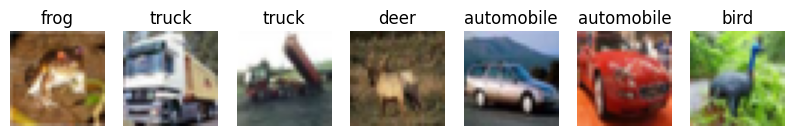

In [135]:
# Visualize Some Sample Images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 2))
for i in range(7):
    plt.subplot(1, 7, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

In [136]:
# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [137]:
# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [138]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

In [140]:
#  Train the Model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 114s 73ms/step - loss: 1.7997 - accuracy: 0.3213 - val_loss: 1.5599 - val_accuracy: 0.4195
Epoch 2/10
1563/1563 [==============================] - 109s 69ms/step - loss: 1.5875 - accuracy: 0.4148 - val_loss: 1.3051 - val_accuracy: 0.5243
Epoch 3/10
1563/1563 [==============================] - 117s 75ms/step - loss: 1.4963 - accuracy: 0.4571 - val_loss: 1.2769 - val_accuracy: 0.5385
Epoch 4/10
1563/1563 [==============================] - 115s 74ms/step - loss: 1.4308 - accuracy: 0.4824 - val_loss: 1.2653 - val_accuracy: 0.5504
Epoch 5/10
1563/1563 [==============================] - 116s 74ms/step - loss: 1.3916 - accuracy: 0.5001 - val_loss: 1.1616 - val_accuracy: 0.5803
Epoch 6/10
1563/1563 [==============================] - 117s 75ms/step - loss: 1.3629 - accuracy: 0.5122 - val_loss: 1.1057 - val_accuracy: 0.6052
Epoch 7/10
1563/1563 [==============================] - 106s 68ms/step - loss: 1.3342 - accuracy: 0.5270 - val_loss: 1

In [143]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 4s 14ms/step - loss: 1.0874 - accuracy: 0.6171
Test Accuracy: 0.6171000003814697


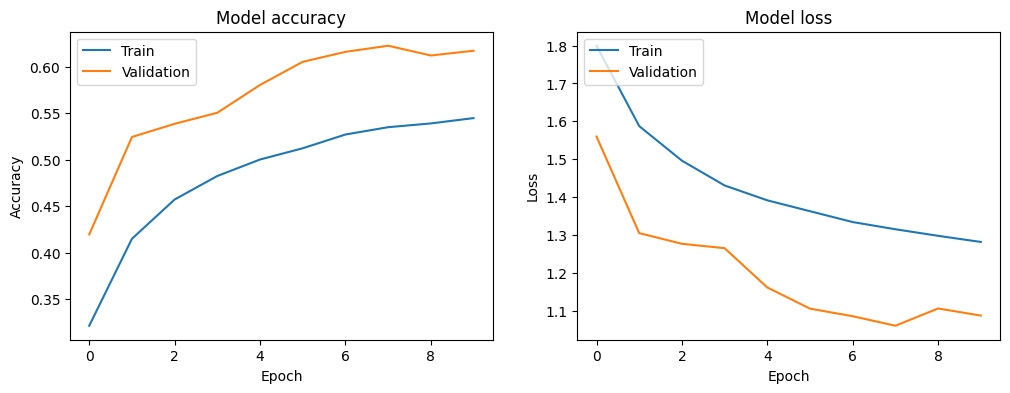

In [144]:
# Visualize Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [145]:
# Save the Model
model.save('cifar10_cnn_model.h5')

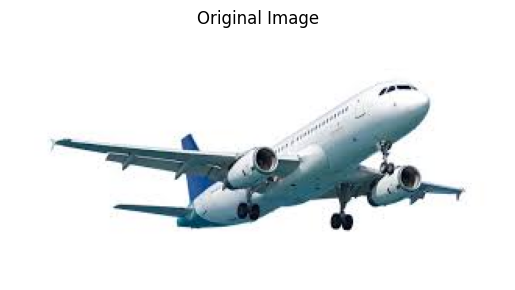

1/1 [==============================] - 0s 137ms/step


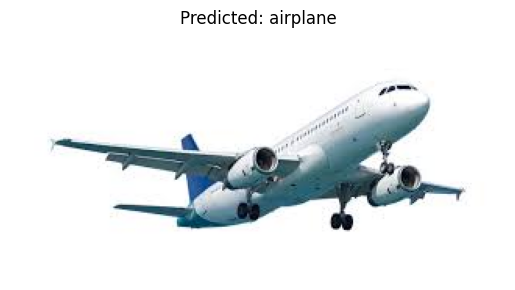

In [155]:
# Load the model
model = load_model('cifar10_cnn_model.h5')

# Load a local image
image_path = '/content/aeroplane.jfif'  # Replace with your image path

# Load the original image (this will be displayed)
original_image = load_img(image_path)

# Display the original image
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Preprocess the image for prediction
new_image = load_img(image_path, target_size=(32, 32))  # Load and resize the image to 32x32
new_image = img_to_array(new_image)  # Convert the image to a NumPy array
new_image = new_image / 255.0  # Normalize the image
new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension

# Make a prediction
prediction = model.predict(new_image)
predicted_class = np.argmax(prediction)

# Display the prediction result
plt.imshow(original_image)
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()